### Import libraries and modules

In [18]:
import os
from skimage import io
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib._color_data as mcd
import numpy as np
from timeit import default_timer
import pandas as pd
from src import detector_descriptor as dd
from src import data


In [2]:
os.chdir('..')

In [3]:
image_set_variance = {
    'bark': 'zoom_rotation', 
    'boat': 'zoom_rotation',
    'leuven': 'light',
    'bikes': 'blur', 
    'trees': 'blur',
    'wall': 'viewpoint',
    'graf': 'viewpoint',
    'ubc': 'jpeg-compression'
}

def get_image_set(image_prefix='all'):
    all_images = data.load_data(os.path.join(os.getcwd(), 'dataset', 'pickle_dump', 'oxford.pckl'))
    if image_prefix is 'all':
        return all_images
    else:
        image_set = {}
        for key, value in all_images.items():
            if image_prefix in key:
                image_set[key] = value
        return image_set
    
ims = get_image_set('bark')
# print(ims.values())

In [4]:
all_detectors = dd.get_all_detectors()
print(list(all_detectors.keys()))

['AGAST', 'KAZE', 'AKAZE', 'FAST', 'BRISK', 'ORB', 'GFTT', 'HarrisLaplace', 'StarDetector']


In [94]:
images = get_image_set('trees')
img = images['trees_img6']

# plt.imshow(img)
# plt.show()
key_points_by_detector = dict()
execution_time = dict()
detector_list = list()
for name, _ in all_detectors.items():
    detector_list.append(name)
    detector = dd.initialize_detector(name)
    start_time = default_timer()
    key_points = detector.detect(img)
    execution_time[name] = default_timer() - start_time
    key_points_by_detector[name] = key_points

dd.print_dictionary(execution_time)


{'AGAST': 0.014475199999651522,
 'AKAZE': 0.10176339999998163,
 'BRISK': 0.04232599999977538,
 'FAST': 0.0034783999999490334,
 'GFTT': 0.029838399999789544,
 'HarrisLaplace': 0.8923310000000129,
 'KAZE': 0.48432530000081897,
 'ORB': 0.010784000000057858,
 'StarDetector': 0.019062100000155624}


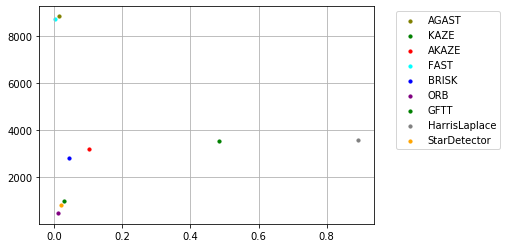

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_data = {}
for name in execution_time.keys():
    total_keypoints = len(key_points_by_detector[name])
    plot_data[name] = [execution_time[name], total_keypoints]
    
fig = plt.plot()

colors = ['olive', 'green', 'red', 'cyan', 'blue', 'purple', 'green', 'grey', 'orange', 'brown']
i = 0
for key, values in plot_data.items():
    x, y = values
    ax.scatter(x, y, c=colors[i], s=10, label=key)
#     ax.annotate(key, xy=(x+0.02, y), textcoords='data')
    i += 1
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.show()


In [99]:
def highlight_max(data, color='#5fba7d'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
def highlight_min(data, color='#d65f5f'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [100]:
df = pd.DataFrame() 
df['Detector'] = plot_data.keys()
df['Execution Time'] = [values[0] for values in plot_data.values()]
df['Number of Keypoints'] = [values[1] for values in plot_data.values()]
# df=df.sort_values(by=['Execution Time'])
df.style.\
    apply(highlight_max, subset=['Execution Time', 'Number of Keypoints']).\
    apply(highlight_min, subset=['Execution Time', 'Number of Keypoints'])

,Detector,Execution Time,Number of Keypoints
0,AGAST,0.014475,8834
1,KAZE,0.484325,3532
2,AKAZE,0.101763,3186
3,FAST,0.003478,8703
4,BRISK,0.042326,2825
5,ORB,0.010784,500
6,GFTT,0.029838,1000
7,HarrisLaplace,0.892331,3603
8,StarDetector,0.019062,824


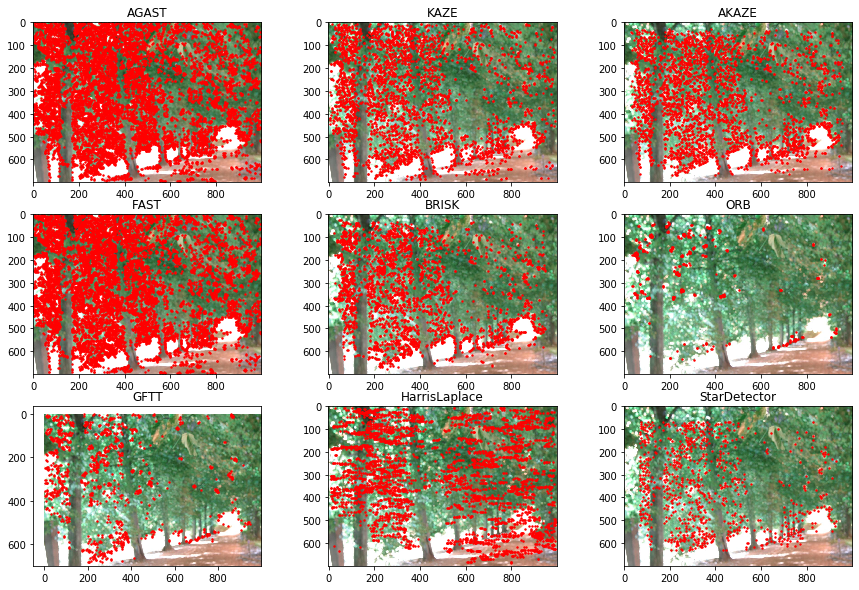

In [98]:
fig, axs = plt.subplots(3, 3, figsize=(15,10))
i = 0
for key, values in key_points_by_detector.items():
    pts = np.asarray([[p.pt[0], p.pt[1]] for p in values])
    x = pts[:,0]
    y = pts[:,1]
    axs[i//3, i%3].set_title(key)
    axs[i//3, i%3].imshow(img)
    axs[i//3, i%3].scatter(x, y, c='r', s=2)
    i += 1
plt.show()

In [54]:
np.max(rows)

590.0